In [1]:
%matplotlib inline
import numpy as np

>**作者** : Gaël Varoquaux

**必要条件**
- 标准Python科学计算环境 (numpy, scipy, matplotlib)
- [Pandas](http://pandas.pydata.org/)
- [Statsmodels](http://statsmodels.sourceforge.net/)
- [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/)

要安装Python及这些依赖，推荐下载[Anaconda Python](http://continuum.io/downloads) 或 [Enthought Canopy](https://store.enthought.com/), 如果你使用Ubuntu或其他linux更应该使用包管理器。

---

**也可以看一下: Python中的贝叶斯统计**

本章并不会涉及贝叶斯统计工具。适用于贝叶斯模型的是[PyMC](http://pymc-devs.github.io/pymc), 在Python中实现了概率编程语言。

---

**为什么统计学要用Python?**

R是一门专注于统计学的语言。Python是带有统计学模块的通用编程语言。R比Python有更多的统计分析功能，以及专用的语法。但是，当面对构建复杂的分析管道，混合统计学以及例如图像分析、文本挖掘或者物理实验控制，Python的富有就是物价的优势。

---

**内容**
- 数据表征和交互
    - 数据作为表格
    - panda data-frame
- 假设检验: 对比两个组
    - Student’s t-test: 最简单的统计检验
    - 配对实验: 对同一个体的重复测量
- 线性模型、多因素和方差分析
    - 用“公式” 来在Python中指定统计模型
    - 多元回归: 包含多元素
    - 事后假设检验: 方差分析 (ANOVA)
- 更多的可视化: 用seaborn来进行统计学探索
    - 配对图: 散点矩阵
    - lmplot: 绘制一个单变量回归
- 交互作用检验

---

**免责声明: 性别问题**

本教程中的一些实例选自性别问题。其原因是在这种问题上这种控制的声明实际上影响了很多人。

## 3.1.1 数据表征和交互

### 3.1.1.1 数据作为表格

统计分析中我们关注的设定是通过一组不同的属性或特征来描述多个观察或样本。然后这个数据可以被视为2D表格，或矩阵，列是数据的不同属性，行是观察。例如包含在[examples/brain_size.csv](http://www.scipy-lectures.org/_downloads/brain_size.csv)的数据:

`
"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353
"5";"Female";137;132;134;"147";"65.0";951545
`

### 3.1.1.2 panda data-frame

我们将会在来自[pandas](http://pandas.pydata.org/)模块的[pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame)中存储和操作这个数据。它是电子表格程序在Python中的一个等价物。它与2D `numpy`数据的区别在于列带有名字，可以在列中存储混合的数据类型，并且有精妙的选择和透视表机制。

#### 3.1.1.2.1 创建dataframes: 读取数据文件或转化数组

**从CSV文件读取**: 使用上面的CSV文件，给出了大脑大小重量和IQ (Willerman et al. 1991) 的观察值 , 数据混合了数量值和类型值:

In [3]:
import pandas
data = pandas.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466


>**分割符**
它是CSV文件，但是分割符是”;”

>**缺失值**
CSV中的第二个个体的weight是缺失的。如果我们没有指定缺失值 (NA = not available) 标记符, 我们将无法进行统计分析。

**从数组中创建**: [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) 也可以视为1D序列, 例如数组或列表的字典，如果我们有3个`numpy`数组:

In [4]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

我们可以将他们暴露为[pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame):

In [5]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,cos,sin,t
0,0.960170,0.279415,-6.000000
1,0.609977,0.792419,-5.368421
2,0.024451,0.999701,-4.736842
3,-0.570509,0.821291,-4.105263
4,-0.945363,0.326021,-3.473684
5,-0.955488,-0.295030,-2.842105
6,-0.596979,-0.802257,-2.210526
7,-0.008151,-0.999967,-1.578947
8,0.583822,-0.811882,-0.947368
9,0.950551,-0.310567,-0.315789


**其他输入**: [pandas](http://pandas.pydata.org/) 可以从SQL、excel文件或者其他格式输入数。见[pandas文档](http://pandas.pydata.org/)。

#### 3.1.1.2.2 操作数据

`data`是[pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame), 与R的dataframe类似:

In [6]:
data.shape    # 40行8列

(40, 8)

In [7]:
data.columns  # 有列

Index([u'Unnamed: 0', u'Gender', u'FSIQ', u'VIQ', u'PIQ', u'Weight', u'Height',
       u'MRI_Count'],
      dtype='object')

In [8]:
print(data['Gender'])  # 列可以用名字访问

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [9]:
# 简单选择器
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

> **注意**: 对于一个大dataframe的快速预览，用它的`describe`方法: [pandas.DataFrame.describe()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)。

**groupby**: 根据类别变量的值拆分dataframe:

In [10]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


**groupby_gender**是一个强力的对象，暴露了结果dataframes组的许多操作:

In [11]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


在`groupby_gender`上使用tab-完成来查找更多。其他的常见分组函数是median, count (对于检查不同子集的缺失值数量很有用) 或sum。Groupby评估是懒惰模式，因为在应用聚合函数之前不会进行什么工作。

>**练习**
- 完整人口VIO的平均值是多少?
- 这项研究中包含了多少男性 / 女性?
- **提示** 使用‘tab完成’来寻找可以调用的方法, 替换在上面例子中的‘mean’。
- 对于男性和女性来说，以log为单位显示的MRI count平均值是多少?

![](http://www.scipy-lectures.org/_images/plot_pandas_1.png)

>**注意**: 上面的绘图中使用了`groupby_gender.boxplot` (见[这个例子](http://www.scipy-lectures.org/packages/statistics/auto_examples/plot_pandas.html#example-plot-pandas-py))。

#### 3.1.1.2.3 绘制数据

Pandas提供一些绘图工具 (`pandas.tools.plotting`, 后面使用的是matplotlib) 来显示在dataframes数据的统计值:

**散点图矩阵**:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105c34810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a5902d0>]], dtype=object)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


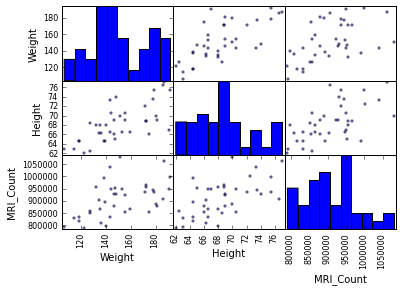

In [15]:
from pandas.tools import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a918b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10affa410>]], dtype=object)

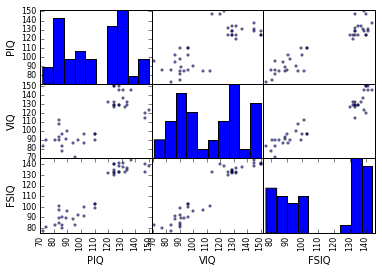

In [16]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   

>**两个总体**

> IQ指标是双峰的, 似乎有两个子总体。

> **练习**

> 只绘制男性的散点图矩阵，然后是只有女性的。你是否认为2个子总体与性别相关?

## 3.1.2 假设检验: 比较两个组

对于简单的[统计检验](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)，我们将可以使用[scipy](http://docs.scipy.org/doc/)的子摸块[scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats):

In [17]:
from scipy import stats

> **也看一下**: Scipy是一个很大的库。关于整个库的快速预览，可以看一下[scipy](http://nbviewer.ipython.org/github/cloga/scipy-lecture-notes_cn/blob/master/1.5.%20Scipy%EF%BC%9A%E9%AB%98%E7%BA%A7%E7%A7%91%E5%AD%A6%E8%AE%A1%E7%AE%97.ipynb) 章节。

### 3.1.2.1 Student’s t检验: 最简单的统计检验

#### 3.1.2.1.1 单样本 t-检验: 检验总体平均数的值

[scipy.stats.ttest_1samp()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)检验数据总体的平均数是否可能等于给定值 (严格来说是否观察值来自于给定总体平均数的正态分布)。它返回一个[T统计值](https://en.wikipedia.org/wiki/Student%27s_t-test)以及[p-值](https://en.wikipedia.org/wiki/P-value) (见函数的帮助):

In [18]:
stats.ttest_1samp(data['VIQ'], 0)   

(30.088099970849328, 1.3289196468728067e-28)

根据$10^-28$的p-值，我们可以声称IQ(VIQ的测量值)总体平均数不是0。

![](http://www.scipy-lectures.org/_images/two_sided.png)

#### 3.1.2.1.2 双样本 t-检验: 检验不同总体的差异

我们已经看到男性和女性总体VIQ平均数是不同的。要检验这个差异是否是显著的，我们可以用[scipy.stats.ttest_ind()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)进行双样本检验:

In [19]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

(-0.77261617232750113, 0.44452876778583217)

### 3.1.2.2 配对实验: 同一个体的重复测量

PIQ、VIQ和FSIQ给出了IQ的3种测量值。让我检验一下FISQ和PIQ是否有显著差异。我们可以使用双样本检验:

In [20]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

(0.46563759638096403, 0.64277250094148408)

使用这种方法的问题是忘记了两个观察之间有联系: FSIQ 和 PIQ 是在相同的个体上进行的测量。因此被试之间的差异是混淆的，并且可以使用"配对实验"或"[重复测量实验](https://en.wikipedia.org/wiki/Repeated_measures_design)"来消除。

In [21]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

(1.7842019405859857, 0.082172638183642358)

![](http://www.scipy-lectures.org/_images/plot_paired_boxplots_1.png)

这等价于单样本的差异检验:

In [22]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

(1.7842019405859857, 0.082172638183642358)

![](http://www.scipy-lectures.org/_images/plot_paired_boxplots_2.png)

T-tests假定高斯误差。我们可以使用[威尔科克森符号秩检验](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test), 放松了这个假设:

In [23]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])   

(274.5, 0.10659492713506856)

> **注意: **非配对实验对应的非参数检验是[曼惠特尼U检验](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U), [scipy.stats.mannwhitneyu()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)。

> **练习**
- 检验男性和女性重量的差异。
- 使用非参数检验来检验男性和女性VIQ的差异。

>**结论**: 我们发现数据并不支持男性和女性VIQ不同的假设。

## 3.1.3 线性模型、多因素和因素分析

### 3.1.3.1 用“公式” 来在Python中指定统计模型

#### 3.1.3.1.1 简单线性回归

给定两组观察值，x和y, 我们想要检验假设y是x的线性函数，换句话说:

$y = x * coef + intercept + e$

其中$e$是观察噪音。我们将使用[statmodels module](http://statsmodels.sourceforge.net/):
- 拟合一个线性模型。我们将使用简单的策略，[普通最小二乘](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS)。
- 检验系数是否是非0。

![](http://www.scipy-lectures.org/_images/plot_regression_1.png)

首先，我们生成模型的虚拟数据:

In [9]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

> **Python中的统计公式**

> [见statsmodels文档](http://statsmodels.sourceforge.net/stable/example_formulas.html)


然后我们指定一个OLS模型并且拟合它:

In [10]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

我们可以检查fit产生的各种统计量:

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 18 Nov 2015   Prob (F-statistic):           8.56e-08
Time:                        17:10:03   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

> **术语**:

> Statsmodels使用统计术语: statsmodel的y变量被称为‘endogenous’而x变量被称为exogenous。更详细的讨论见[这里](http://statsmodels.sourceforge.net/devel/endog_exog.html)。

> 为了简化，y (endogenous) 是你要尝试预测的值，而 x (exogenous) 代表用来进行这个预测的特征。

> **练习**

> 从以上模型中取回估计参数。**提示**: 使用tab-完成来找到相关的属性。

#### 3.1.3.1.2 类别变量: 比较组或多个类别

让我们回到大脑大小的数据:

In [27]:
data = pandas.read_csv('examples/brain_size.csv', sep=';', na_values=".")

我们可以写一个比较，用线性模型比较男女IQ:

In [28]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 18 Nov 2015   Prob (F-statistic):              0.445
Time:                        17:34:10   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

---

**特定模型的提示**

**强制类别**: ‘Gender’ 被自动识别为类别变量，因此，它的每一个不同值都被处理为不同的实体。
使用:

In [29]:
model = ols('VIQ ~ C(Gender)', data).fit()

可以将一个整数列强制作为类别处理。

**截距**: 我们可以在公式中用-1删除截距，或者用+1强制使用截距。

默认，statsmodel将带有K和可能值的类别变量处理为K-1'虚拟变量' (最后一个水平被吸收到截距项中)。在绝大多数情况下，这都是很好的默认选择 - 但是，为类别变量指定不同的编码方式也是可以的 (http://statsmodels.sourceforge.net/devel/contrasts.html)。

**FSIQ和PIQ差异的t-检验**

要比较不同类型的IQ，我们需要创建一个"长形式"的表格，用一个类别变量来标识IQ类型:

In [30]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
5    99  fsiq
6   138  fsiq
7    92  fsiq
8    89  fsiq
9   133  fsiq
10  132  fsiq
11  141  fsiq
12  135  fsiq
13  140  fsiq
14   96  fsiq
15   83  fsiq
16  132  fsiq
17  100  fsiq
18  101  fsiq
19   80  fsiq
20   83  fsiq
21   97  fsiq
22  135  fsiq
23  139  fsiq
24   91  fsiq
25  141  fsiq
26   85  fsiq
27  103  fsiq
28   77  fsiq
29  130  fsiq
..  ...   ...
10  124   piq
11  128   piq
12  124   piq
13  147   piq
14   90   piq
15   96   piq
16  120   piq
17  102   piq
18   84   piq
19   86   piq
20   86   piq
21   84   piq
22  134   piq
23  128   piq
24  102   piq
25  131   piq
26   84   piq
27  110   piq
28   72   piq
29  124   piq
30  132   piq
31  137   piq
32  110   piq
33   86   piq
34   81   piq
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [31]:
model = ols("iq ~ type", data_long).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Wed, 18 Nov 2015   Prob (F-statistic):              0.643
Time:                        18:16:40   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

我们可以看到我们获得了与前面t-检验相同的值，以及相同的对应iq type的p-值:

In [32]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

(0.46563759638096403, 0.64277250094148408)

### 3.1.3.2 多元回归: 包含多因素

考虑用2个变量x和y来解释变量z的线性模型:

$z = x \, c_1 + y \, c_2 + i + e$

这个模型可以被视为在3D世界中用一个平面去拟合 (x, y, z) 的点云。

![](http://www.scipy-lectures.org/_images/plot_regression_3d_1.png)

**实例: 鸢尾花数据 ([examples/iris.csv](examples/iris.csv))**

萼片和花瓣的大小似乎是相关的: 越大的花越大! 但是，在不同的种之间是否有额外的系统效应?

![](http://www.scipy-lectures.org/_images/plot_iris_analysis_1.png)

In [33]:
data = pandas.read_csv('examples/iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 19 Nov 2015   Prob (F-statistic):           1.58e-20
Time:                        09:56:04   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### 3.1.3.3 事后假设检验: 方差分析 (ANOVA)

在上面的鸢尾花例子中，在排除了萼片的影响之后，我们想要检验versicolor和virginica的花瓣长度是否有差异。这可以被公式化为检验在上面的线性模型中versicolor和virginica系数的差异 (方差分析, ANOVA)。我们写了"差异"向量的参数来估计: 我们想要用[F-检验](https://en.wikipedia.org/wiki/F-test)检验 "`name[T.versicolor] - name[T.virginica]`":

In [36]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=array([[ 3.24533535]]), p=0.073690587817, df_denom=146, df_num=1>


是否差异显著？

> **练习**
> 回到大脑大小 + IQ 数据, 排除了大脑大小、高度和重量的影响后，检验男女的VIQ差异。

## 3.1.4 更多可视化:  用seaborn来进行统计学探索

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) 集成了简单的统计学拟合与pandas dataframes绘图。

让我们考虑一个500个个体的工资及其它个人信息的数据 ([Berndt, ER. The Practice of Econometrics. 1991. NY: Addison-Wesley](http://lib.stat.cmu.edu/datasets/CPS_85_Wages))。

加载并绘制工资数据的完整代码可以在[对应的例子](http://www.scipy-lectures.org/packages/statistics/auto_examples/plot_wage_data.html#example-plot-wage-data-py)中找到。

In [3]:
print data

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION   WAGE  AGE  RACE  OCCUPATION  \
0            8      0    1          21      0   5.10   35     2           6   
1            9      0    1          42      0   4.95   57     3           6   
2           12      0    0           1      0   6.67   19     3           6   
3           12      0    0           4      0   4.00   22     3           6   
4           12      0    0          17      0   7.50   35     3           6   
5           13      0    0           9      1  13.07   28     3           6   
6           10      1    0          27      0   4.45   43     3           6   
7           12      0    0           9      0  19.47   27     3           6   
8           16      0    0          11      0  13.28   33     3           6   
9           12      0    0           9      0   8.75   27     3           6   
10          12      0    0          17      1  11.35   35     3           6   
11          12      0    0          19      1  11.50

### 3.1.4.1 配对图: 散点矩阵

使用[seaborn.pairplot()](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)来显示散点矩阵我们可以很轻松的对连续变量之间的交互有一个直觉:

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


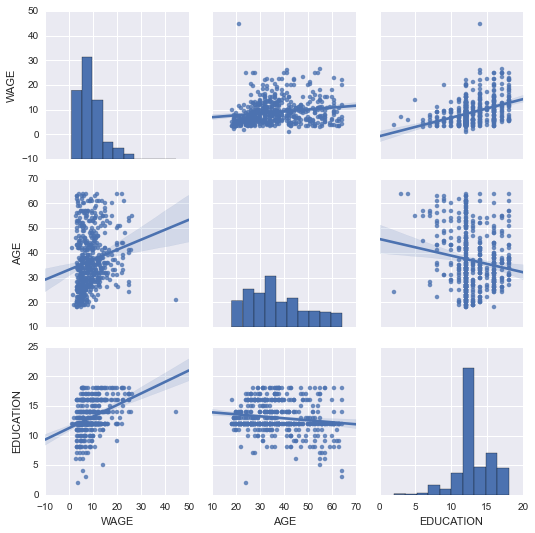

In [4]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg') 

可以用颜色来绘制类别变量:

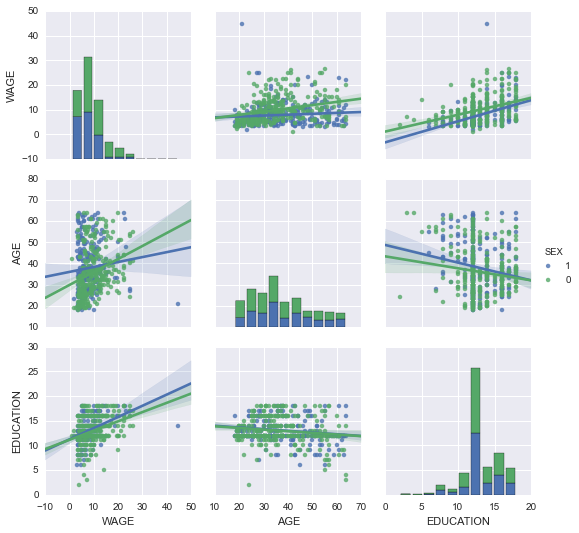

In [5]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')

---

**看一下并感受一些matplotlib设置**

Seaborn改变了matplotlib的默认图案以便获得更"现代"、更"类似Excel"的外观。它是通过import来实现的。重置默认设置可以使用:

In [8]:
from matplotlib import pyplot as plt
plt.rcdefaults()

要切换回seaborn设置, 或者更好理解seaborn中的样式, 见[seaborn文档中的相关部分](http://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html)。

---

### 3.1.4.2. lmplot: 绘制一个单变量回归

回归捕捉了一个变量与另一个变量的关系，例如薪水和教育，可以用[seaborn.lmplot()](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html#seaborn.lmplot)来绘制:

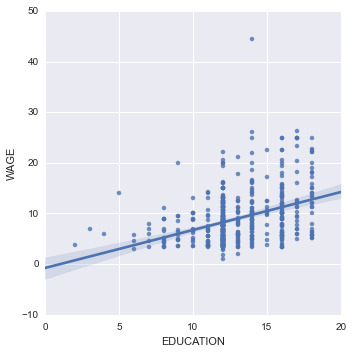

In [6]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data) 

--- 

**稳健回归**

在上图中，有一些数据点偏离了右侧的主要云，他们可能是异常值，对总体没有代表性，但是，推动了回归。

要计算对异常值不敏感的回归，必须使用[稳健模型](https://en.wikipedia.org/wiki/Robust_statistics)。在seaborn的绘图函数中可以使用`robust=True`，或者在statsmodels用"稳健线性回归"`statsmodels.formula.api.rlm()`来替换OLS。

## 3.1.5 交互作用检验

![](http://www.scipy-lectures.org/_images/plot_wage_education_gender_1.png)

是否教育对工资的提升在男性中比女性中更多?

上图来自两个不同的拟合。我们需要公式化一个简单的模型来检验总体倾斜的差异。这通过"交互作用"来完成。

In [22]:
result = ols(formula='WAGE ~ EDUCATION + C(SEX) + EDUCATION * C(SEX)', data=data).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     41.50
Date:                Thu, 19 Nov 2015   Prob (F-statistic):           4.24e-24
Time:                        12:06:38   Log-Likelihood:                -1575.0
No. Observations:                 534   AIC:                             3158.
Df Residuals:                     530   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 1.10

我们可以得出结论教育对男性的益处大于女性吗？

---
**带回家的信息**
- 假设检验和p-值告诉你影响 / 差异的**显著性**
- **公式** (带有类别变量) 让你可以表达你数据中的丰富联系
- **可视化**数据和简单模型拟合很重要!
- **条件化** (添加可以解释所有或部分方差的因素) 在改变交互作用建模方面非常重要。

---

## 3.1.6 完整例子

### [3.1.6.1 例子](http://www.scipy-lectures.org/packages/statistics/auto_examples/index.html)
#### [3.1.6.1.1 代码例子](http://www.scipy-lectures.org/packages/statistics/auto_examples/index.html#code-examples)
#### [3.1.6.1.2 课程练习的答案](http://www.scipy-lectures.org/packages/statistics/auto_examples/index.html#solutions-to-the-exercises-of-the-course)